# Assignment 
1. Upload your [yourname]dataset.npz to whatsapp group
2. Vary the parameters from splitting data into trainImage and testImage to find the best accuracy
3. Predict and display your prediction 

In [676]:
import tensorflow as tf 
print(tf.__version__)

2.7.0


In [677]:
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [678]:
datasetFileName = "azureen_dataset.npz"
with np.load(datasetFileName, allow_pickle=True) as data:
    dataImages = data['images']
    dataLabels = data['labels']
    dataLabelNames = data['labelnames']

In [679]:
print(dataImages.shape)
print(dataLabels.shape)
print(dataLabelNames.shape)

(22,)
(22,)
(22,)


In [680]:
print(dataImages.dtype)
print(dataLabels.dtype)
print(dataLabelNames.dtype)

object
int64
<U10


In [681]:
print(dataLabels)
print(dataLabelNames)

[0 1 2 3 4 5 6 7 8 0 1 3 5 6 7 8 0 1 3 4 6 7]
['afiq' 'azureen' 'gavin' 'goke' 'inamul' 'jincheng' 'mahmuda' 'numan'
 'saseendran' 'afiq' 'azureen' 'goke' 'jincheng' 'mahmuda' 'numan'
 'saseendran' 'afiq' 'azureen' 'goke' 'inamul' 'mahmuda' 'numan']


In [682]:
classNames = sorted(np.unique(dataLabelNames))
print(classNames)

['afiq', 'azureen', 'gavin', 'goke', 'inamul', 'jincheng', 'mahmuda', 'numan', 'saseendran']


In [683]:
# model expect shape of image to be 300,300

import cv2 as cv 

#desiredShape = (300,300,3)

N = len(dataImages)
shape = (N, 300, 300, 3)
y = np.empty(shape)

for i in range(N):
    y[i] = cv.resize(dataImages[i], [300,300], interpolation=cv.INTER_NEAREST)

dataImages.dtype, y.dtype, y.shape

dataImages = y

In [684]:
# Split the data 
trainImages, testImages, trainLabels, testLabels = train_test_split(dataImages, dataLabels, test_size=0.35, random_state=40)
print(trainImages.shape)
print(testImages.shape)

(14, 300, 300, 3)
(8, 300, 300, 3)


In [685]:
print(testLabels.shape)
print(trainLabels.shape)

(8,)
(14,)


In [686]:
testLabels

array([0, 7, 7, 4, 8, 3, 4, 1])

In [687]:
inputShape = trainImages[0].shape
outputShape = len(classNames)

inputShape, outputShape

((300, 300, 3), 9)

In [688]:
# Normalize
trainImages = trainImages / 255.0
testImages = testImages / 255.0


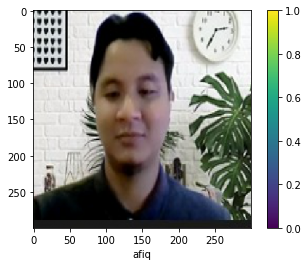

In [689]:
# Visualize train image data 
plt.figure()
plt.imshow(trainImages[0])
plt.xlabel(classNames[trainLabels[0]])
plt.colorbar()
plt.grid(False)
plt.show()

In [690]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = inputShape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(outputShape)

])
model.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_25 (Flatten)        (None, 270000)            0         
                                                                 
 dense_50 (Dense)            (None, 128)               34560128  
                                                                 
 dense_51 (Dense)            (None, 9)                 1161      
                                                                 
Total params: 34,561,289
Trainable params: 34,561,289
Non-trainable params: 0
_________________________________________________________________


In [691]:
model.compile(optimizer='adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics = ['accuracy'])

In [692]:
trainLabels

array([0, 0, 6, 8, 1, 3, 2, 6, 5, 1, 3, 5, 7, 6])

In [693]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [694]:
model.fit(trainImages, trainLabels, epochs=23, callbacks=myCallback())

Epoch 1/23
1/1 [==============================] - 1s 548ms/step - loss: 2.6752 - accuracy: 0.1429
Epoch 2/23
1/1 [==============================] - 0s 138ms/step - loss: 242.0674 - accuracy: 0.1429
Epoch 3/23
1/1 [==============================] - 0s 142ms/step - loss: 101.9329 - accuracy: 0.2143
Epoch 4/23
1/1 [==============================] - 0s 146ms/step - loss: 136.9044 - accuracy: 0.2857
Epoch 5/23
1/1 [==============================] - 0s 126ms/step - loss: 93.3682 - accuracy: 0.2857
Epoch 6/23
1/1 [==============================] - 0s 129ms/step - loss: 94.8180 - accuracy: 0.2857
Epoch 7/23
1/1 [==============================] - 0s 132ms/step - loss: 65.0097 - accuracy: 0.3571
Epoch 8/23
1/1 [==============================] - 0s 129ms/step - loss: 46.2865 - accuracy: 0.2143
Epoch 9/23
1/1 [==============================] - 0s 135ms/step - loss: 43.2595 - accuracy: 0.4286
Epoch 10/23
1/1 [==============================] - 0s 127ms/step - loss: 30.3956 - accuracy: 0.3571
Epoch 1

In [695]:
testLoss, testAcc = model.evaluate(testImages, testLabels, verbose=2)
print('Test Acc:', testAcc)

1/1 - 0s - loss: 201.3508 - accuracy: 0.2500 - 122ms/epoch - 122ms/step
Test Acc: 0.25


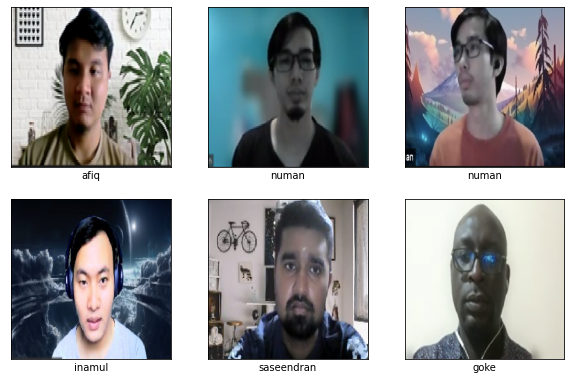

In [696]:
plt.figure(figsize=(10,10))

for i in range(6):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(testImages[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[testLabels[i]])

plt.show()

In [697]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [698]:
predictions = probability_model.predict(testImages)

In [699]:
predictions[0]


array([1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 1.010162e-19, 0.000000e+00, 0.000000e+00,
       0.000000e+00], dtype=float32)

In [700]:
np.argmax(predictions[0])

0

In [701]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'yellow'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classNames[predicted_label],
                                100*np.max(predictions_array),
                                classNames[true_label]),
                                color=color)

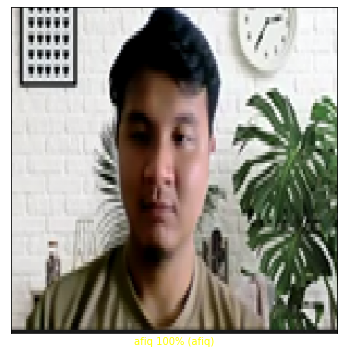

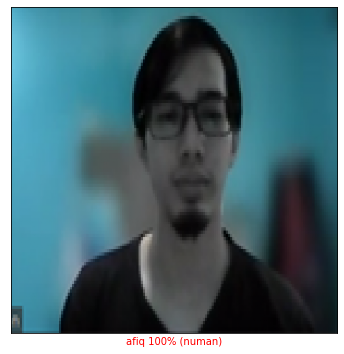

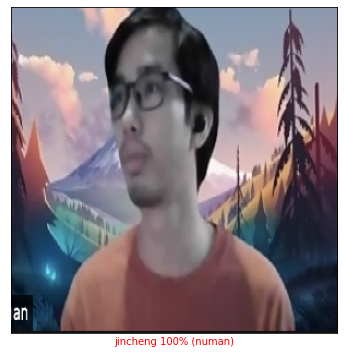

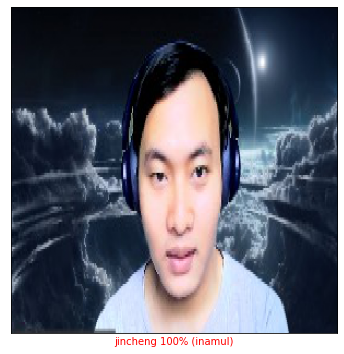

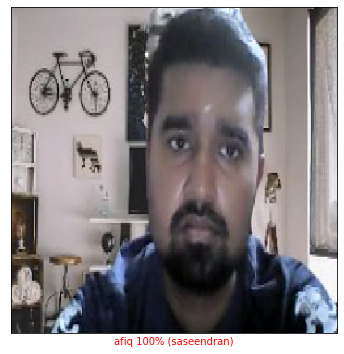

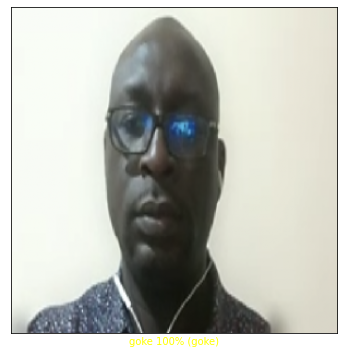

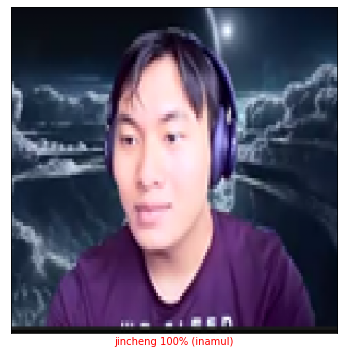

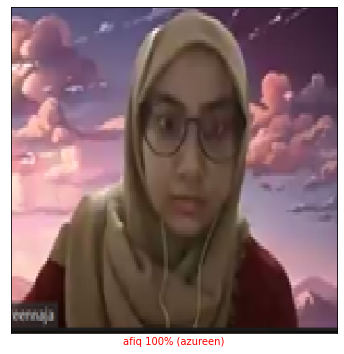

In [702]:
for i in range (len(predictions)):
    plt.figure(figsize=(6,6))
    plot_image(i, predictions[i], testLabels, testImages)


plt.show()